<a href="https://colab.research.google.com/github/harvinderchahal/DEC2024/blob/main/ML_SVM_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving ngsim.csv to ngsim (4).csv
Dataset Summary:
        Vehicle_ID      Global_X      Global_Y   Global_Time       v_Vel  \
count   999.000000  9.990000e+02  9.990000e+02  9.990000e+02  999.000000   
mean   1392.102102  6.037569e+06  1.888179e+06  1.030571e+12   23.645746   
std     820.773005  1.120503e+06  1.820936e+05  2.997514e+11   16.040793   
min       5.000000  2.230495e+06  1.375637e+06  1.163052e+09    0.000000   
25%     704.000000  6.042843e+06  1.872400e+06  1.110000e+12    9.970000   
50%    1341.000000  6.451659e+06  1.872992e+06  1.120000e+12   24.220000   
75%    2043.000000  6.452155e+06  1.873806e+06  1.120000e+12   35.580000   
max    3333.000000  6.452703e+06  2.134735e+06  1.120000e+12   68.110000   

            v_Acc     Lane_ID  Space_Headway  Time_Headway     v_Class  
count  999.000000  999.000000     999.000000     999.00000  999.000000  
mean     0.195776    3.066066      63.931682     610.69957    2.021021  
std      4.810856    2.116743      81.482383 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


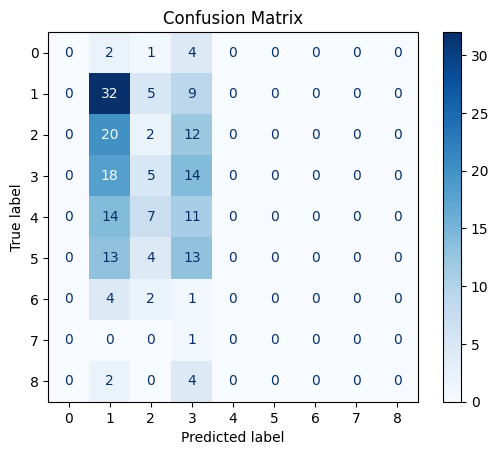


Regression Evaluation:
Mean Absolute Error (MAE): 9.229107995457076
Root Mean Squared Error (RMSE): 11.856194838248152
R-squared (R2): 0.4657105806598085


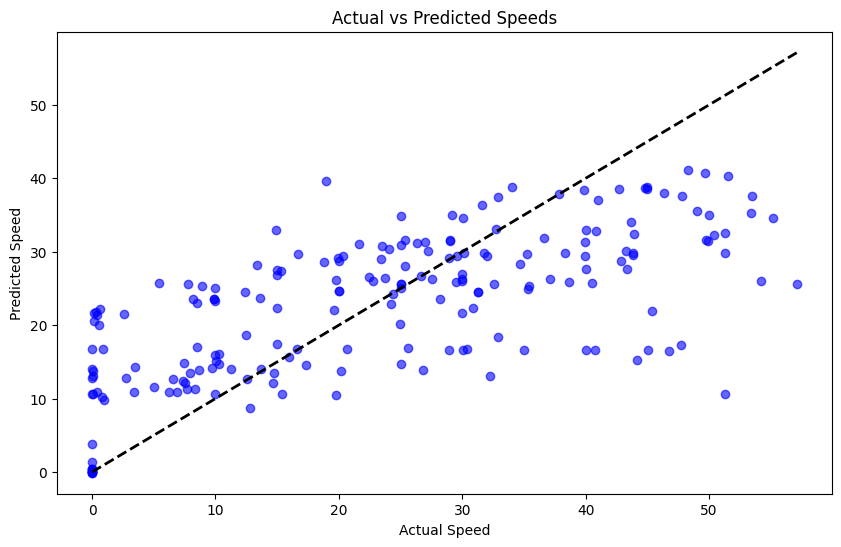

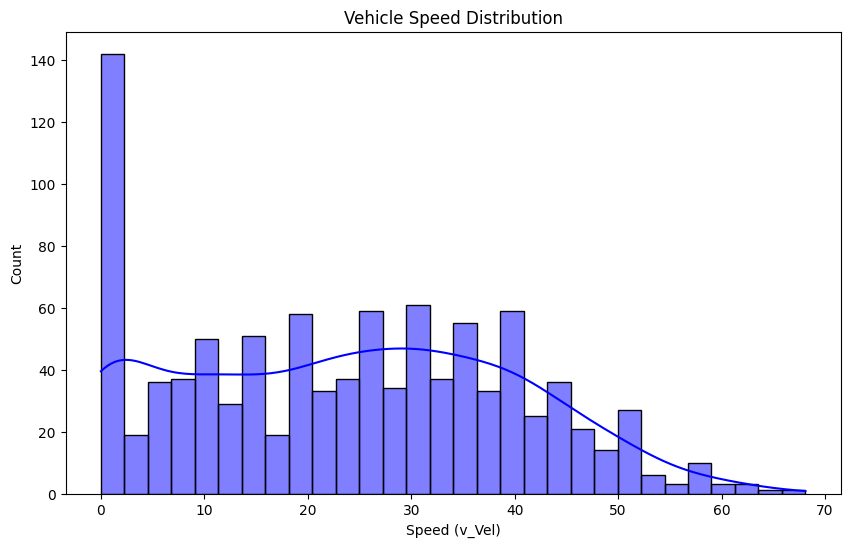

<ipython-input-8-20eb42cf8481>:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Lane_ID", data=data, palette="viridis")


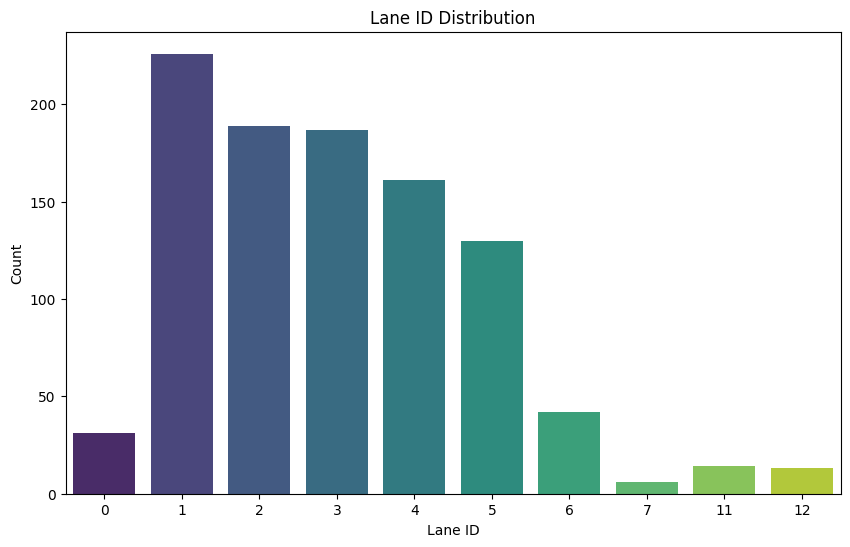

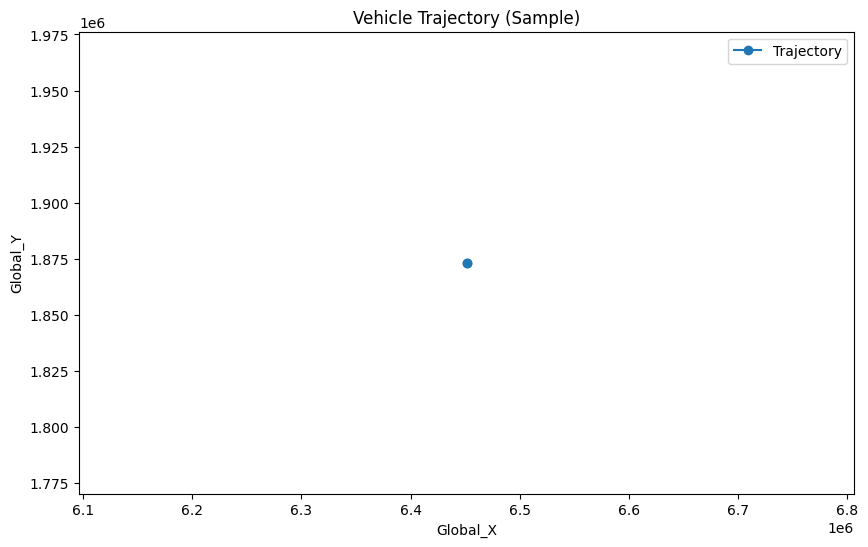

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    ConfusionMatrixDisplay,
)

# Load the NGSIM dataset
# Replace 'ngsim_dataset.csv' with the actual dataset path
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("ngsim.csv")

# Select relevant columns
columns = [
    "Vehicle_ID", "Global_X", "Global_Y", "Global_Time", "v_Vel", "v_Acc",
    "Lane_ID", "Space_Headway", "Time_Headway", "v_Class"
]
data = data[columns]

# Display basic statistics
print("Dataset Summary:")
print(data.describe())

# Handle missing data
data = data.dropna()

# Feature engineering
# Create a relative speed column (if preceding vehicle data is available)
if "Preceding" in data.columns and "v_Vel" in data.columns:
    data["Relative_Speed"] = data["v_Vel"] - data.groupby("Vehicle_ID")["v_Vel"].shift(1)

# Encode categorical features (e.g., Vehicle_Class)
data["v_Class"] = data["v_Class"].astype("category").cat.codes

# Prepare data for classification (e.g., Lane Change Detection)
X = data[["v_Vel", "v_Acc", "Space_Headway", "Time_Headway", "v_Class"]]
y = data["Lane_ID"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM for classification
svm_classifier = SVC(kernel="rbf", C=1, gamma="scale", random_state=42)
svm_classifier.fit(X_train, y_train)

# Predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Regression example (e.g., speed prediction)
X_reg = data[["Global_X", "Global_Y", "Lane_ID", "Space_Headway", "Time_Headway"]]
y_reg = data["v_Vel"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Standardize features for regression
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

# Train an SVM for regression
svm_regressor = SVR(kernel="rbf", C=1, gamma="scale")
svm_regressor.fit(X_train_reg, y_train_reg)

# Predictions
y_pred_reg = svm_regressor.predict(X_test_reg)

# Evaluate the regression model
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print("\nRegression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Visualize actual vs. predicted speeds
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6, color="blue")
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], "k--", lw=2)
plt.title("Actual vs Predicted Speeds")
plt.xlabel("Actual Speed")
plt.ylabel("Predicted Speed")
plt.show()

# Visualize data distributions
plt.figure(figsize=(10, 6))
sns.histplot(data["v_Vel"], kde=True, color="blue", bins=30)
plt.title("Vehicle Speed Distribution")
plt.xlabel("Speed (v_Vel)")
plt.show()

# Visualize Lane-ID distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="Lane_ID", data=data, palette="viridis")
plt.title("Lane ID Distribution")
plt.xlabel("Lane ID")
plt.ylabel("Count")
plt.show()

# Visualize trajectory data
plt.figure(figsize=(10, 6))
sample_vehicle = data[data["Vehicle_ID"] == data["Vehicle_ID"].unique()[0]]
plt.plot(sample_vehicle["Global_X"], sample_vehicle["Global_Y"], marker="o", label="Trajectory")
plt.title("Vehicle Trajectory (Sample)")
plt.xlabel("Global_X")
plt.ylabel("Global_Y")
plt.legend()
plt.show()